<a href="https://colab.research.google.com/github/tarinishukla/PointCloudWorkshop-Oct2019/blob/master/Demo2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas


     |████████████████████████████████| 972kB 6.8MB/s 
     |████████████████████████████████| 14.8MB 212kB/s 
     |████████████████████████████████| 6.5MB 58.1MB/s 


In [6]:
import geopandas as gpd

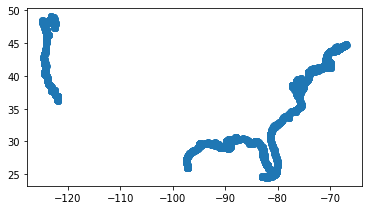

In [8]:
coastline_attr_gpd=gpd.read_file("/content/drive/MyDrive/Spring_2021/GeoAI/Data/Data/coastline_attr_seagrass.shp")
coastline_attr_gpd.plot()


In [9]:
coastline_attr_gpd.head()


,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,sea_grass,geometry
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,1,POINT (-82.22100 24.50021)
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,1,POINT (-81.16694 25.14926)
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,0,POINT (-90.58674 29.24938)
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,1,POINT (-76.05466 36.96940)
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,1,POINT (-76.38891 39.27398)


In [10]:
coastline_attr_gpd["x"]=coastline_attr_gpd.geometry.x
coastline_attr_gpd["y"]=coastline_attr_gpd.geometry.y
coastline_attr_gpd.head()

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,sea_grass,geometry,x,y
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,1,POINT (-82.22100 24.50021),-82.221000,24.500212
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,1,POINT (-81.16694 25.14926),-81.166938,25.149262
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,0,POINT (-90.58674 29.24938),-90.586741,29.249380
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,1,POINT (-76.05466 36.96940),-76.054661,36.969399
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,1,POINT (-76.38891 39.27398),-76.388908,39.273977


In [11]:
coastline_attr_gpd.shape

(10000, 12)

In [12]:
training_data=coastline_attr_gpd.sample(frac=0.8,random_state=42)
test_data=coastline_attr_gpd.drop(training_data.index)

In [13]:
training_label=training_data.pop("nitrate")
test_label=test_data.pop("nitrate")

In [14]:
training_data=training_data[["salinity",	"srtm30",	"silicate",	"phosphate",	"disso2",	"temp", "x",	"y"]]

In [15]:
test_data=test_data[["salinity",	"srtm30",	"silicate",	"phosphate",	"disso2",	"temp", "x",	"y"]]

In [19]:
training_label.head()


6252    9.058800
4684    1.079670
1731    0.844095
4742    7.414680
4521    5.384510
Name: nitrate, dtype: float64

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [21]:
tree_reg=DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
forest_reg=RandomForestRegressor(min_samples_leaf=10, random_state=42)

In [22]:
tree_reg.fit(training_data,training_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [23]:
forest_reg.fit(training_data,training_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [25]:
y_pred_tree=tree_reg.predict(test_data)
y_pred_forest=forest_reg.predict(test_data)

In [26]:
y_pred_tree[0]

0.5906545000000001

In [27]:
test_label_np=test_label.to_numpy()
test_label_np[0]

0.589654

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
rmse=mean_squared_error(test_label_np,y_pred_tree,squared=False)

In [31]:
rmse

0.017314144357289965

In [32]:
rmse=mean_squared_error(test_label_np,y_pred_forest,squared=False)
rmse

0.015396886585799813